# Graphical Method for Solving a System of Linear Equations

The graphical method is a way to find the solution to a system of linear programming problems with 2 variables. 

In this notebook, we solve the following linear programming problem:

\begin{align*}
\text{Maximize } & z = 500t + 300c \\
\text{subject to } & \\
& 2t+c \leq 40 \\
& t+2c \leq 50 \\
& c\geq 0, t \geq 0
\end{align*}

The graphical method involves plotting the constraints on a graph and finding the feasible region. The feasible region is the area where all constraints are satisfied. The optimal solution is found at the vertex of the feasible region that maximizes or minimizes the objective function.

## Linear Programing Definition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Eq, solve
from IPython.display import display, Math

# Define the symbols
t, c = sp.symbols('t c')

# Define the LP model
opdir = 'max'
objective = 500*t + 300*c
constraints = [2*t + c <= 40, t + 2*c <= 50, t >= 0, c >= 0]

# Print the LP model
display(Math(opdir + ' \\; Z = ' + sp.latex(objective)))
display(Math('\\text{s.t. }' + sp.latex(constraints)))

    


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Feasible Region

<Figure size 1000x800 with 0 Axes>

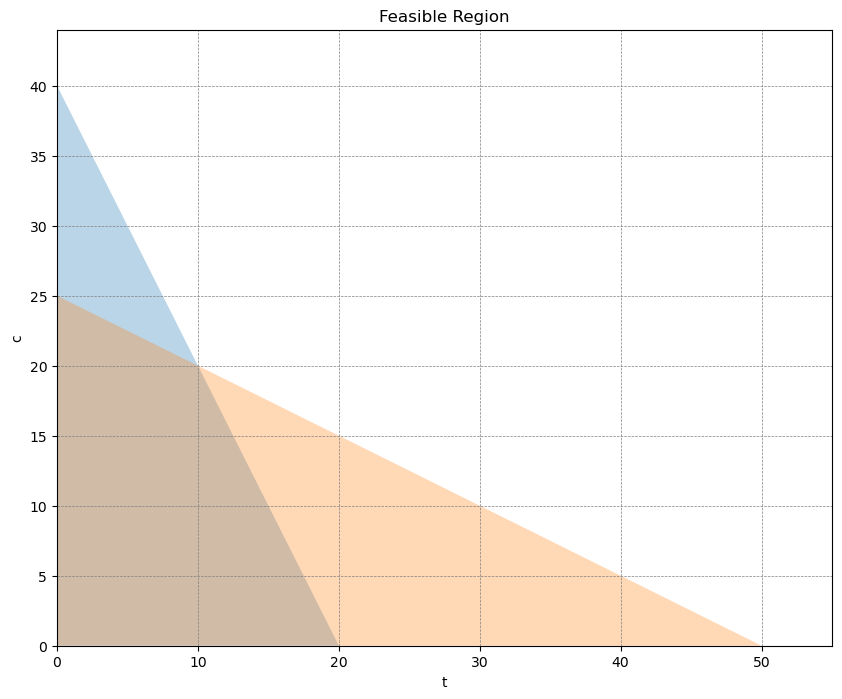

In [10]:
def plot_constraints():
    # Solve each constraint for c in terms of t
    y = []
    for constraint in constraints:
        lhs = constraint.lhs
        rhs = constraint.rhs
        b = solve(lhs - rhs, c)
        if len(b) > 0 and not b[0] == 0:
            direc = '<=' if constraint.rel_op == '<=' else '>='
            y.append((b[0], direc))
            

    # Define x_max and y_max
    x_max = 1.1*max([float(solve(y[k][0], t)[0]) for k in range(len(y))])
    y_max = 1.1*max([float(y[k][0].subs(t, 0)) for k in range(len(y))])
        
    # Plot the feasible region
    t_vals = np.linspace(0, x_max, 400)
    plt.figure(figsize=(10, 8))


    # Save the plot as a variable
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot each constraint
    for func, direc in y:
        c_vals = [float(func.subs(t, val)) for val in t_vals]
        if direc == '<=':
            ax.fill_between(t_vals, c_vals, 0, where=(np.array(c_vals) >= 0), alpha=0.3)
        else:
            ax.fill_between(t_vals, c_vals, y_max, where=(np.array(c_vals) <= y_max), alpha=0.3)

    # Plot the axes
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(color='gray', linestyle='--', linewidth=0.5)

    ax.set_xlim((0, x_max))
    ax.set_ylim((0, y_max))
    ax.set_xlabel(sp.latex(t))
    ax.set_ylabel(sp.latex(c))
    ax.set_title('Feasible Region')
    
    return plt, fig, ax

plot_constraints()[0].show()


## Extreme Points

<Figure size 1000x800 with 0 Axes>

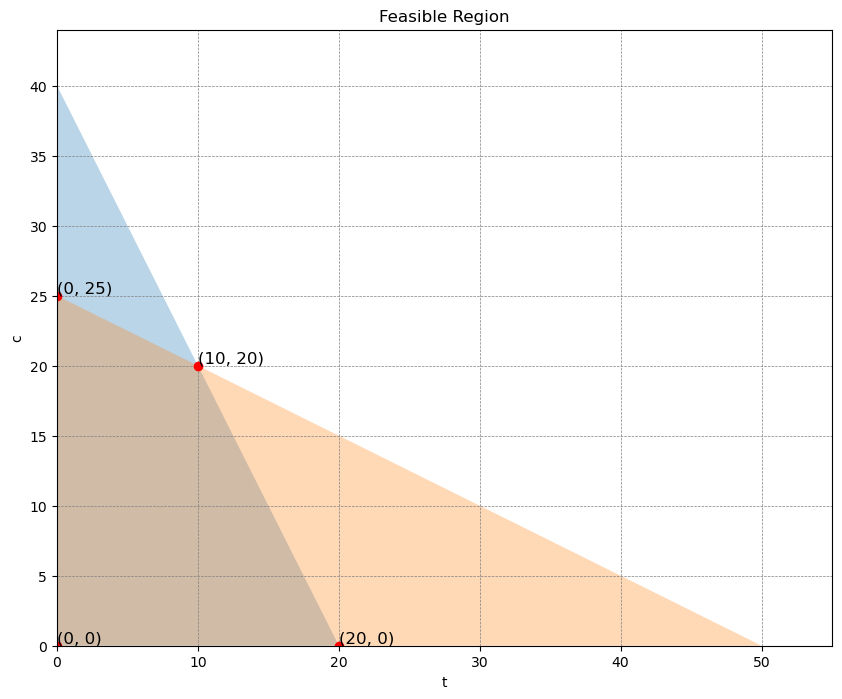

In [3]:
# Find the extreme points
extreme_points = []
for i in range(len(constraints)):
    for j in range(i+1, len(constraints)):
        eq1 = Eq(constraints[i].lhs, constraints[i].rhs)
        eq2 = Eq(constraints[j].lhs, constraints[j].rhs)
        sol = solve((eq1, eq2), (t, c))
        if sol:
            extreme_points.append(sol)

# Filter the extreme points that are within the feasible region
feasible_points = []
for point in extreme_points:
    if all(constraint.subs(point) for constraint in constraints):
        feasible_points.append(point)
        
plt, fig, ax = plot_constraints()

# Plot the extreme points
for point in feasible_points:
    ax.plot(point[t], point[c], 'ro')
    ax.text(point[t], point[c], f'({point[t]}, {point[c]})', fontsize=12, verticalalignment='bottom')

# Show the updated plot
plt.show()

## Optimal Solution

In [7]:
import pandas as pd

# Convert feasible_points to a list of tuples
feasible_points_tuples = [(point[t], point[c]) for point in feasible_points]

# Create the DataFrame
df = pd.DataFrame(feasible_points_tuples, columns=['t', 'c'])
df['t'] = df['t'].apply(lambda x: round(x, 2))
df['c'] = df['c'].apply(lambda x: round(x, 2))

df['z'] = [objective.subs(point) for point in feasible_points]

# Print the DataFrame
print(df)



# Get the optimal solution
if opdir == 'max':
    optimal_value = max(df['z'])
else:
    optimal_value = min(df['z'])

optimal_point = feasible_points[df[df['z'] == optimal_value].index[0]]

print(f"Optimal Point: {optimal_point}")
print(f"Optimal Value: {optimal_value}")

    t   c      z
0  10  20  11000
1  20   0  10000
2   0  25   7500
3   0   0      0
Optimal Point: {c: 20, t: 10}
Optimal Value: 11000
